In [165]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

In [166]:
#import data .txt file and read it into a numpy array

def read_data(filename):
    data = np.loadtxt('../data/'+filename+'.txt', delimiter=' ')
    return data

#Data files belong to cold dark matter halo simulations of Milky Way particles interacting with the Large Magellanic Cloud (LMC)
#mw prefix is for MW particles in the non interacting regime
#lmc prefix is for MW particles in perturbed dark matter halo

data_mw = read_data('rand_mwb1_000')
data_lmc = read_data('rand_mwlmcb1_110')


#Potential energy of particles in dark matter halo
pot_mw = data_mw[:,6]
pot_mw_lmc = data_lmc[:,6]

#Extract velocity magnitude of particles in dark matter halo
v_mw = data_mw[:,3:6]
v_mw_lmc = data_lmc[:,3:6]

#Get position of particles in Milky Way's dark matter halo
pos_mw = data_mw[:,0:3]
pos_mw_lmc = data_lmc[:,0:3]



In [167]:
def cartessian_projection(pos, figname):
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    # pos_magnitude = np.linalg.norm(pos_mw_lmc, axis=1)
    hist = ax.hist2d(pos[:,1], pos[:,2], bins=np.linspace(-150,150,150), norm=LogNorm(), cmap='RdBu')
    ax.set_xlabel(r'x[$\mathrm{kpc}$]')
    ax.set_ylabel(r'y[$\mathrm{kpc}$]')
    ax.set_title("Proyeccion cartesiana en el plano yz")
    im = ax.imshow(pos, vmin=-0.2, vmax=0.2, cmap='RdBu', extent=[-250,250,-250,250])
    plt.colorbar(im, ax=ax)
    plt.show()
    plt.close()
    plt.savefig('./../media/imgs/cartessian_projection/'+figname+'.png', bbox_inches='tight', dpi = 300)
    return hist

In [168]:
def cartessian_projection_zoom(pos,figname):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax.hist2d(pos[:,1], pos[:,2], bins=np.linspace(-150,150,150), norm=LogNorm())
    im = ax.imshow(pos, vmin=-0.2, vmax=0.2, cmap='RdBu', extent=[-150,150,-150,150])
    fig.suptitle("Proyeccion cartesiana en el plano yz")
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.colorbar(im, ax=ax)
    plt.savefig('./../media/imgs/cartessian_projection_zoom/'+figname+'.png', bbox_inches='tight', dpi = 400)
    plt.show()
    plt.close()
    return 0

In [169]:

# cartessian_projection(pos_mw_lmc, 'lmc')

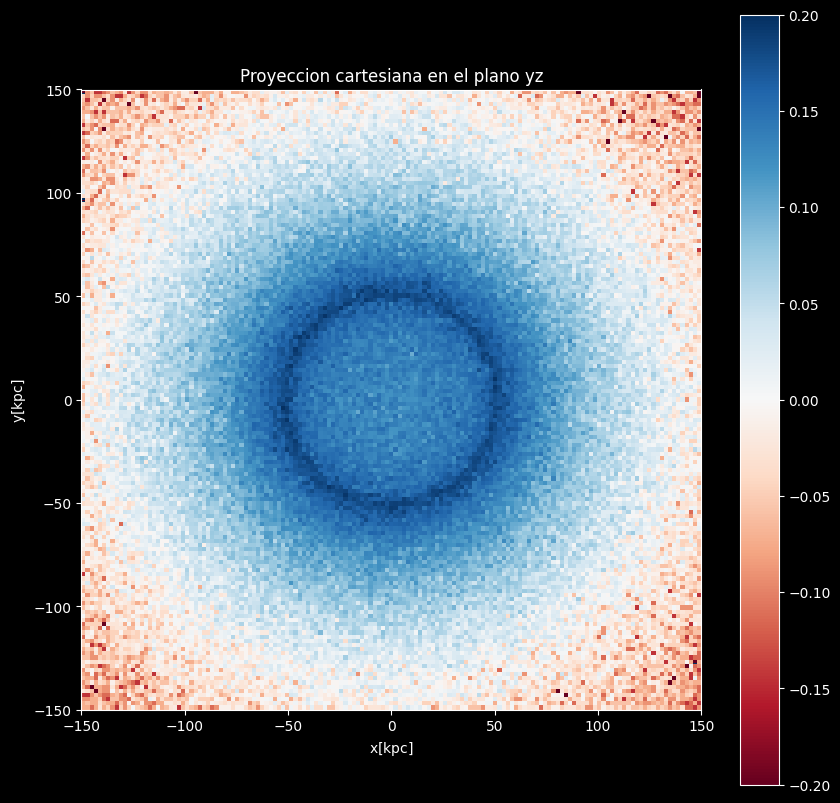

<Figure size 640x480 with 0 Axes>

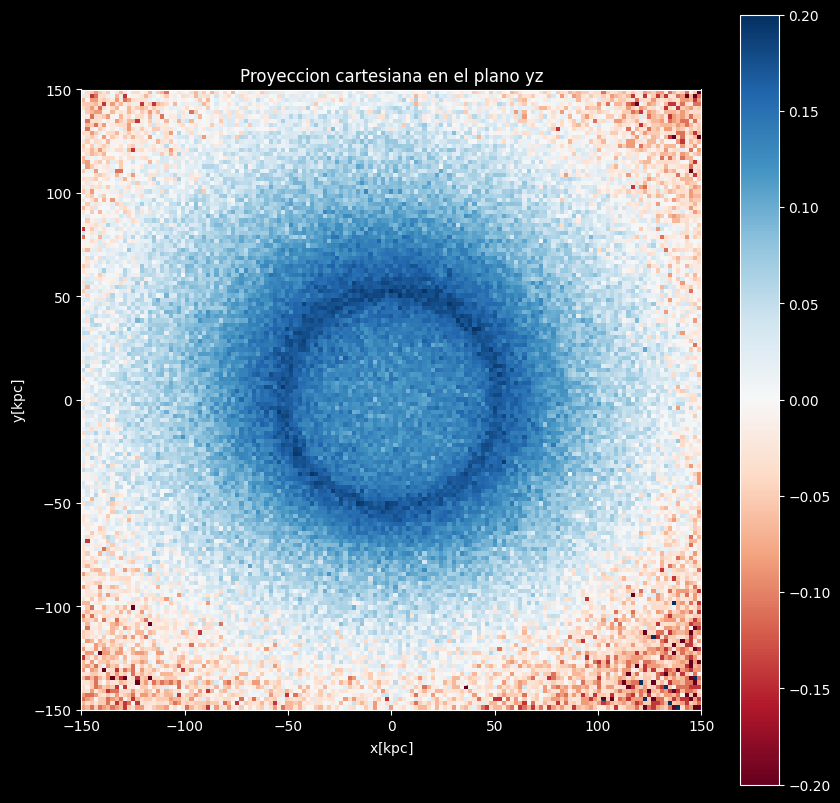

(array([[ 4.,  5.,  3., ...,  5., 14., 10.],
        [ 5.,  7.,  4., ..., 12.,  8.,  7.],
        [ 3.,  6.,  5., ...,  4.,  2.,  6.],
        ...,
        [ 4.,  6.,  1., ...,  5.,  5., 10.],
        [ 1.,  5.,  4., ...,  2.,  1.,  6.],
        [ 1.,  3.,  2., ...,  4.,  3.,  1.]]),
 array([-150.        , -147.98657718, -145.97315436, -143.95973154,
        -141.94630872, -139.93288591, -137.91946309, -135.90604027,
        -133.89261745, -131.87919463, -129.86577181, -127.85234899,
        -125.83892617, -123.82550336, -121.81208054, -119.79865772,
        -117.7852349 , -115.77181208, -113.75838926, -111.74496644,
        -109.73154362, -107.71812081, -105.70469799, -103.69127517,
        -101.67785235,  -99.66442953,  -97.65100671,  -95.63758389,
         -93.62416107,  -91.61073826,  -89.59731544,  -87.58389262,
         -85.5704698 ,  -83.55704698,  -81.54362416,  -79.53020134,
         -77.51677852,  -75.5033557 ,  -73.48993289,  -71.47651007,
         -69.46308725,  -67.4496644

<Figure size 640x480 with 0 Axes>

In [170]:
#remove particles in a 50 kpc radius from the center of the Milky Way
pos_mw_lmc_50 = pos_mw_lmc[np.where(np.linalg.norm(pos_mw_lmc, axis=1) > 50)]
# print(pos_mw_lmc_50)
# cartessian_projection_zoom(pos_mw_lmc_50, 'mw_lmc_50')
cartessian_projection(pos_mw, 'mw')
cartessian_projection(pos_mw_lmc_50, 'mw_lmc_50')


In [171]:
# density_yz_mw = np.histogram2d(pos_mw[:,1], pos_mw[:,2], bins=np.linspace(-150,150,150))[0]
# density_yz_lmc = np.histogram2d(pos_mw_lmc[:,1], pos_mw_lmc[:,2], bins=np.linspace(-150,150,150))[0]
# density_yz_lmc_50 = np.histogram2d(pos_mw_lmc_50[:,1], pos_mw_lmc_50[:,2], bins=np.linspace(-150,150,150))[0]

density_yz_lmc = np.histogram2d(pos_mw_lmc_50[:,1], pos_mw_lmc_50[:,2], bins=np.linspace(-150,150,150))
density_yz_mw = np.histogram2d(pos_mw[:,1], pos_mw[:,2], bins=np.linspace(-150,150,150))
nparticles_yz_lmc = density_yz_lmc[0]
nparticles_yz_mw = density_yz_mw[0]
div_yz_lmc = (nparticles_yz_lmc/nparticles_yz_mw)-1
sus_yz_lmc = nparticles_yz_lmc-nparticles_yz_mw


C:\Users\Stephanie\AppData\Local\Temp\ipykernel_17560\2964917402.py:9: RuntimeWarning: divide by zero encountered in divide
  div_yz_lmc = (nparticles_yz_lmc/nparticles_yz_mw)-1


In [172]:
def hist_comparison (density,figname):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    im = ax.imshow(density, vmin=-0.2, vmax=0.2, cmap='plasma_r', extent=[-150,150,-150,150])
    plt.colorbar(im, ax=ax)
    plt.title("Contraste de densidad en el plano yz particulas en el halo perturbado", fontsize=15)
    # plt.gca().invert_yaxis()
    plt.savefig('./../media/imgs/hist_comparison/'+figname+'.png', bbox_inches='tight', dpi = 400)
    plt.show()
    plt.close()
    return 0

In [ ]:
def hist_comparison_zoom (density,figname):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    im = ax.imshow(density, vmin=-0.2, vmax=0.2, cmap='plasma_r', extent=[-150,150,-150,150])
    plt.colorbar(im, ax=ax)
    plt.title("Contraste de densidad en el plano yz particulas en el halo perturbado", fontsize=15)
    plt.xlim(-45,95)
    plt.ylim(-45,95)
    # plt.gca().invert_yaxis()
    plt.savefig('./../media/imgs/hist_comparison_zoom/'+figname+'.png', bbox_inches='tight', dpi = 400)
    plt.show()
    plt.close()
    return 0

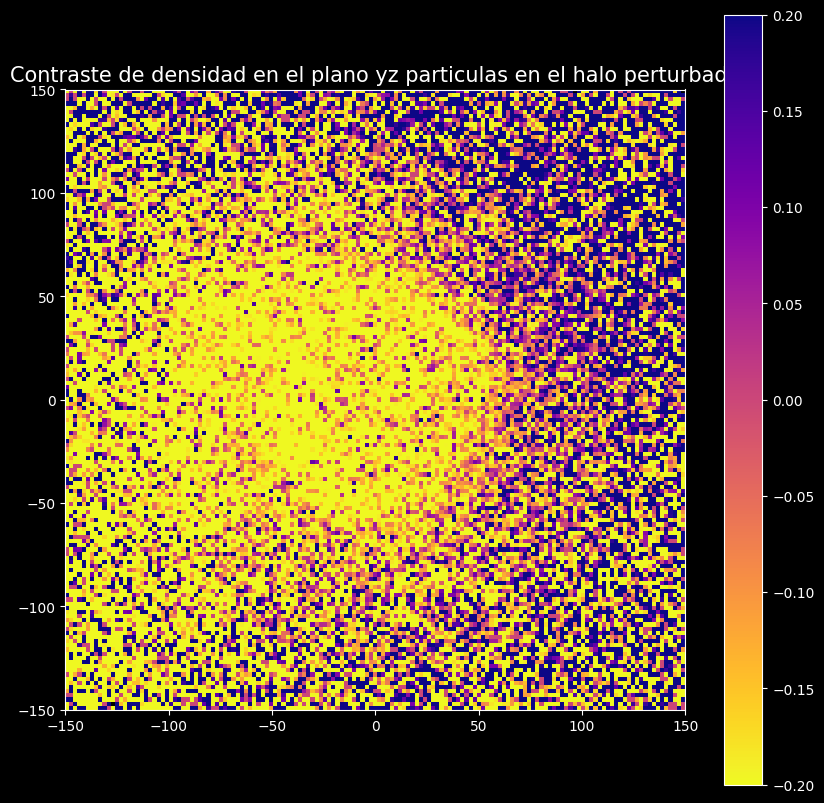

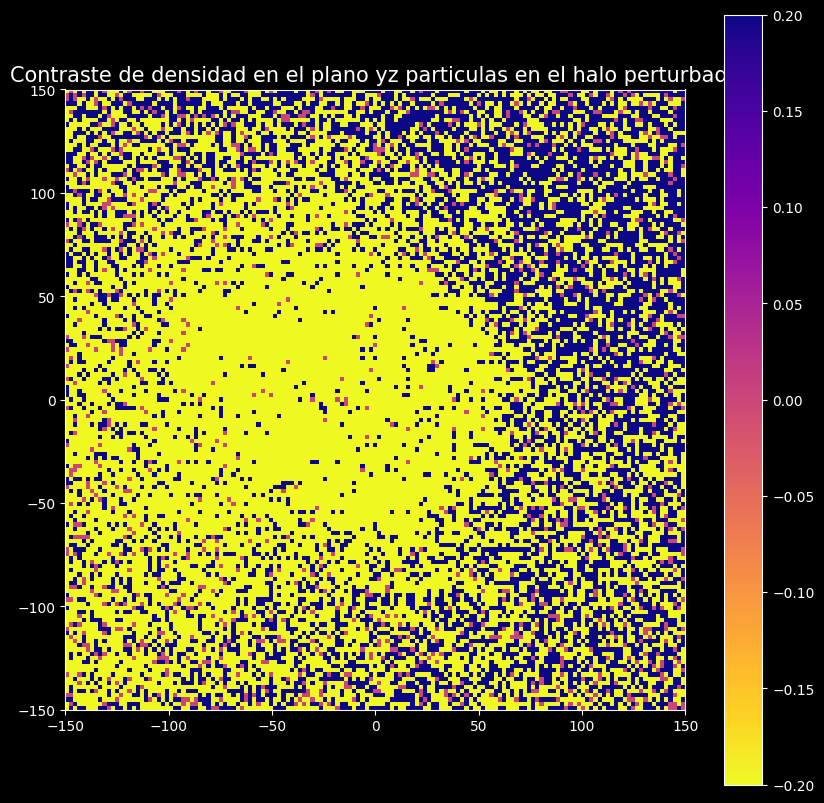

0

In [173]:
# hist_comparison(density_yz_mw, 'mw')
hist_comparison(div_yz_lmc, 'lmc_div')
hist_comparison(sus_yz_lmc, 'lmc_sus')
# hist_comparison(density_yz_lmc_50, 'lmc_50')
hist_comparison_zoom(div_yz_lmc, 'lmc_div_zoom')
hist_comparison_zoom(sus_yz_lmc, 'lmc_sus_zoom')
